In [84]:
#Averages the tau_tumbling rather than the PSD for a random single chain#

1

conc: 0.5
edot: 0.40984
prop/RG50_10_0.500000_42.263516_0_3.00_3.00_10.00_0.40984_1_1.txt


NameError: name 'scipy' is not defined

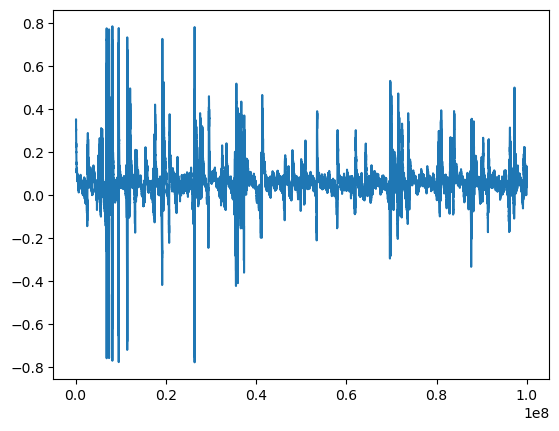

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.5,1,2])
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
#edot = np.array([0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
edot = np.array([0.40984,0.61475,1.02459,1.22951,2.04918,2.45902]) #for 0.5c*-extended
it = 1
ntr = 30
dt = 0.0001
tau_r = np.array([122]) #relaxation time
# tau_r = np.array([122,135,193]) #relaxation time
nfft_set = 24976
tau_tumble = np.zeros(len(edot))
STD = np.zeros(len(edot))

# xSS = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# xSSer = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# Wi = np.zeros(len(edot))

for c in range(0,len(conc)):
    print("conc: %g"%conc[c])
    for d in range(0,len(edot)):
        #allPSD = np.array(ntr*[np.array(nfft_set*[0.0])]) #nfft_set points in PSD
        allPSD = []
        alltau = []
        print("edot: %g"%edot[d])
        for tr in range(1,ntr+1):
            
            file_name = "prop/RG" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            
            if tr==1:
                print(file_name)
            
            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tstart*Nc:,0]
            chain = my_data[tstart*Nc:,1]
            Gxy_data = my_data[tstart*Nc:,3]
            Gxx_data = my_data[tstart*Nc:,2]
            Gyy_data = my_data[tstart*Nc:,5]
            #print(Gxx_data)
            
            """
            Get data for a random chain
            """     
            Gxy = []
            Gxx = []
            Gyy = []
            t = []
            ran = np.random.randint(0,high=Nc)
            #print(ran)
            for i in range(tstart*ran,len(time)):
                #print(i)
                if chain[i]==ran:
                    t.append(time[i])
                    Gxy.append(Gxy_data[i])
                    Gxx.append(Gxx_data[i])
                    Gyy.append(Gyy_data[i])
            #print(Gxx)
            
            """
            Calculate orientation angle
            """ 
            allOA = np.zeros(len(Gxx))
            for i in range(0,len(Gxx)):
                allOA[i] = 0.5*np.arctan(2*Gxy[i]/(Gxx[i]-Gyy[i]))
                
            plt.plot(t,allOA)

            """
            Calculate Power Spectral Density (PSD) of Orientation Angle
            """
            tau = time*dt
            #print(tau[Nc]-tau[0])
            fs = 1/(tau[Nc]-tau[0])
            (f, S) = scipy.signal.periodogram(allOA, fs, scaling='density',nfft=nfft_set)
            
            #print(len(S))

            #allPSD[tr-1] = S
            
            """
            Calculate tumbling frequency w/ peak of PSD
            """  
            alltau.append(1/f[np.where(S == max(S))[0][0]])
            
            allPSD.append(S)
            
        """
        Average PSD + tau_tumble across trajectories
        """     
        
        PSD = []
        for k in range(0,len(S)):
            x = []
            for j in range(0,ntr):
                x.append(allPSD[j][k])
            #print(np.mean(x))
            PSD.append(np.mean(x))
        
        plt.loglog(f*tau_r[c],np.array(PSD)/tau_r[c])
        #plt.xlim(1e-2,3e2)
        plt.ylim(1e-9,1)
        plt.show()
        
        tau_tumble[d] = np.mean(alltau)
        STD[d] = np.std(alltau)
        
        print("<tau_tumble> = %g ± %g" % (tau_tumble[d],STD[d]/np.sqrt(ntr)))

            
    """
    Output tau_tumble(Wi)_conc
    """     
#     with open('tumble/Tau(Wi)_'+str(conc[c])+'c_it'+str(it)+".csv",mode='w') as practice_file:
#         practice = csv.writer(practice_file,delimiter=',')
#         y = ["Wi","tau_tumble","Err"]
#         practice.writerow(y)
#         for i in range(0,len(edot)):
#             x = [round(edot[i]*tau_r[c]),tau_tumble[i],STD[i]/np.sqrt(ntr)]
#             practice.writerow(x)
            
            
            
            
            
            
            
            
            
            
            

In [ ]:
#Averages the tau_tumbling rather than the PSD for all chains#

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.signal

Nb = 50
Nc = 10
#conc = np.array([0.5,1,2])
conc = np.array([2])
box_length = np.array([26.624347])
#box_length = np.array([42.263516,33.544575,26.624347])
#edot = np.array([0.04098,0.08197,0.16393,0.40984,0.61475,0.81967,1.02459,1.22951,1.63934,2.04918,2.45902]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.37037,0.55556,0.74074,0.92593,1.11111,1.48148,1.85185,2.22222]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.25907,0.38860,0.51813,0.64767,0.77720,1.03627,1.29534,1.55440]) #for 2c*
#edot = np.array([0.01562,0.03125,0.06250,0.15625,0.23438,0.31250,0.39062,0.46875,0.62500,0.78125,0.93750]) #for 2c* Nb=75
edot = np.array([0.02591,0.05181,0.10363,0.25907,0.51813,0.77720,1.03627,1.29534]) #for 2c*
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
it = 1
ntr = 30
dt = 0.0001
tau_r = np.array([193]) #relaxation time
# tau_r = np.array([122,135,193]) #relaxation time
nfft_set = 24976
tau_tumble = np.zeros(len(edot))
STD = np.zeros(len(edot))

# xSS = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# xSSer = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# Wi = np.zeros(len(edot))

for c in range(0,len(conc)):
    print("conc: %g"%conc[c])
    for d in range(0,len(edot)):
        #allPSD = np.array(ntr*[np.array(nfft_set*[0.0])]) #nfft_set points in PSD
        allPSD = []
        alltau = []
        print("edot: %g"%edot[d])
        for tr in range(1,ntr+1):
            
            file_name = "prop/RG" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            
            if tr==1:
                print(file_name)
            
            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tstart*Nc:,0]
            chain = my_data[tstart*Nc:,1]
            Gxy_data = my_data[tstart*Nc:,3]
            Gxx_data = my_data[tstart*Nc:,2]
            Gyy_data = my_data[tstart*Nc:,5]
            #print(Gxx_data)
            
            """
            Get data for each chain
            """     
            tau_allchains = []
            for n in range(0,Nc):
                Gxy = []
                Gxx = []
                Gyy = []
                t = []
                #print(ran)
                for i in range(tstart*n,len(time)):
                    #print(i)
                    if chain[i]==n:
                        t.append(time[i])
                        Gxy.append(Gxy_data[i])
                        Gxx.append(Gxx_data[i])
                        Gyy.append(Gyy_data[i])
                #print(Gxx)

                """
                Calculate orientation angle for each chain
                """ 
                allOA = np.zeros(len(Gxx))
                for i in range(0,len(Gxx)):
                    allOA[i] = 0.5*np.arctan(2*Gxy[i]/(Gxx[i]-Gyy[i]))

                #plt.plot(t,allOA)

                """
                Calculate Power Spectral Density (PSD) of Orientation Angle for each chain
                """
                tau = time*dt
                #print(tau[Nc]-tau[0])
                fs = 1/(tau[Nc]-tau[0])
                (f, S) = scipy.signal.periodogram(allOA, fs, scaling='density',nfft=nfft_set)
                plt.close()
                #print(len(S))

                #allPSD[tr-1] = S

                """
                Calculate tumbling frequency w/ peak of PSD for each chain 
                """  
                tau_allchains.append(1/f[np.where(S == max(S))[0][0]])

                allPSD.append(S)
                
            """
            Average tau_tumble across chains
            """     
            alltau.append(np.mean(tau_allchains))
            
        """
        Average PSD + tau_tumble across trajectories
        """     
        
        PSD = []
        for k in range(0,len(S)):
            x = []
            for j in range(0,ntr):
                x.append(allPSD[j][k])
            #print(np.mean(x))
            PSD.append(np.mean(x))
        
#         plt.loglog(f*tau_r[c],np.array(PSD)/tau_r[c])
#         #plt.xlim(1e-2,3e2)
#         plt.ylim(1e-9,1)
#         plt.show()
        
        tau_tumble[d] = np.mean(alltau)
        STD[d] = np.std(alltau)
        
        print("<tau_tumble> = %g ± %g" % (tau_tumble[d],STD[d]/np.sqrt(ntr)))

            
    """
    Output tau_tumble(Wi)_conc
    """     
    with open('tumble/Tau(Wi)_'+str(conc[c])+'c_it'+str(it)+".csv",mode='w') as practice_file:
        practice = csv.writer(practice_file,delimiter=',')
        y = ["Wi","tau_tumble","Err"]
        practice.writerow(y)
        for i in range(0,len(edot)):
            x = [round(edot[i]*tau_r[c]),tau_tumble[i],STD[i]/np.sqrt(ntr)]
            practice.writerow(x)

            
            
            
            
            
            
            
            
            
            
            

conc: 2
edot: 0.02591
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.02591_1_1.txt


/var/folders/dv/2kpt26m57rv3l01y5k59wmnc0000gq/T/ipykernel_57396/3630991149.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  allOA[i] = 0.5*np.arctan(2*Gxy[i]/(Gxx[i]-Gyy[i]))


<tau_tumble> = 227.236 ± 36.7552
edot: 0.05181
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.05181_1_1.txt
<tau_tumble> = 388.373 ± 54.718
edot: 0.10363
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.10363_1_1.txt
<tau_tumble> = 468.07 ± 45.4128
edot: 0.25907
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.25907_1_1.txt
<tau_tumble> = 136.685 ± 26.0114
edot: 0.51813
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.51813_1_1.txt
<tau_tumble> = 87.3439 ± 26.3707
edot: 0.7772
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_0.77720_1_1.txt
<tau_tumble> = 112.243 ± 28.1186
edot: 1.03627
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_1.03627_1_1.txt
<tau_tumble> = 109.899 ± 26.0161
edot: 1.29534
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_1.29534_1_1.txt
<tau_tumble> = 121.012 ± 31.7887


In [ ]:
#Plots Averaged PSD(w)

conc: 0.5
edot: 1.63934
prop/RG50_10_0.500000_42.263516_0_3.00_3.00_10.00_1.63934_1_0.txt


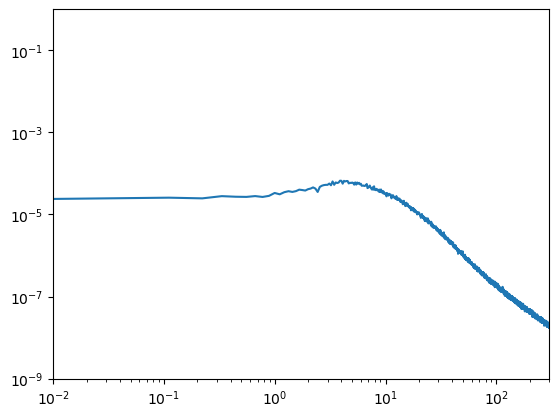

<tau_tumble> for edot = 1.63934 complete.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.signal

Nb = 50
Nc = 10
conc = np.array([0.5])
box_length = np.array([42.263516])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([1.63934]) 
#edot = np.array([0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
it = 0
ntr = 30
dt = 0.0001
tau_r = np.array([277])  # relaxation time
nfft_set = 24976

for c in range(len(conc)):
    print("conc: %g" % conc[c])
    for d in range(len(edot)):
        alltau = []
        avg_PSD = None  # Initialize variable for averaging PSD across trajectories
        print("edot: %g" % edot[d])

        for tr in range(1, ntr + 1):
            file_name = f"prop/RG{Nb}_{Nc}_{conc[c]:.6f}_{box_length[c]:.6f}_{Ncharges}_{barrier:.2f}_{barrier2:.2f}_{lambda_d:.2f}_{edot[d]:.5f}_{tr}_{it}.txt"

            if tr == 1:
                print(file_name)

            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name, delimiter=' ')
            time = my_data[tstart * Nc:, 0]
            chain = my_data[tstart * Nc:, 1]
            Gxy_data = my_data[tstart * Nc:, 3]
            Gxx_data = my_data[tstart * Nc:, 2]
            Gyy_data = my_data[tstart * Nc:, 5]

            """
            Get data for each chain and calculate PSD
            """     
            PSD_allchains = []

            for n in range(Nc):
                Gxy = []
                Gxx = []
                Gyy = []
                t = []

                for i in range(tstart * n, len(time)):
                    if chain[i] == n:
                        t.append(time[i])
                        Gxy.append(Gxy_data[i])
                        Gxx.append(Gxx_data[i])
                        Gyy.append(Gyy_data[i])

                """
                Calculate orientation angle for each chain
                """
                allOA = 0.5 * np.arctan2(2 * np.array(Gxy), np.array(Gxx) - np.array(Gyy))

                """
                Calculate Power Spectral Density (PSD) of Orientation Angle for each chain
                """
                tau = time * dt
                fs = 1 / (tau[Nc] - tau[0])
                f, S = scipy.signal.periodogram(allOA, fs, scaling='density', nfft=nfft_set)
                
                PSD_allchains.append(S)

            """
            Average PSD across chains for this trajectory
            """
            PSD_avg_trajectory = np.mean(PSD_allchains, axis=0)

            """
            Accumulate the averaged PSD across trajectories
            """
            if avg_PSD is None:
                avg_PSD = PSD_avg_trajectory
            else:
                avg_PSD += PSD_avg_trajectory

        """
        Final average PSD across all trajectories
        """
        avg_PSD /= ntr

        """
        Plot the averaged PSD
        """
        plt.loglog(f * tau_r[c], avg_PSD / tau_r[c])
        plt.xlim(1e-2, 3e2)
        plt.ylim(1e-9, 1)
        plt.show()

        """
        Output PSD(w)_edot to file
        """
        with open(f'tumble/PSD(w)_Wi{round(edot[d] * tau_r[c])}_it{it}.csv', mode='w') as practice_file:
            practice = csv.writer(practice_file, delimiter=',')
            practice.writerow(["w*dt", "PSD"])
            for i in range(len(avg_PSD)):
                practice.writerow([f[i] * tau_r[c] *dt, avg_PSD[i] / tau_r[c]])

        print("<tau_tumble> for edot = %g complete." % edot[d])


conc: 2
edot: 1.03627
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_1.03627_1_0.txt


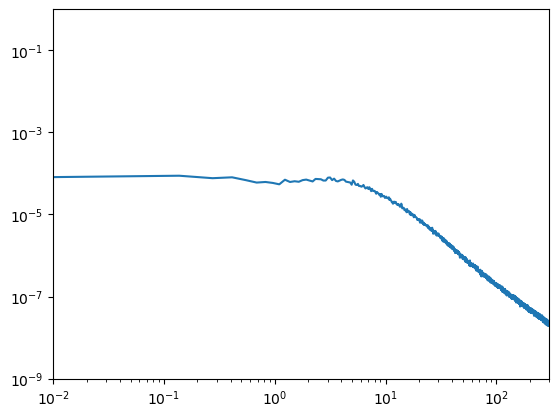

<tau_tumble> for edot = 1.03627 complete.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.signal

Nb = 50
Nc = 10
conc = np.array([2])
box_length = np.array([26.624347])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([1.03627]) 
#edot = np.array([0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*
it = 0
ntr = 30
dt = 0.0001
tau_r = np.array([343])  # relaxation time
nfft_set = 24976

for c in range(len(conc)):
    print("conc: %g" % conc[c])
    for d in range(len(edot)):
        alltau = []
        avg_PSD = None  # Initialize variable for averaging PSD across trajectories
        print("edot: %g" % edot[d])

        for tr in range(1, ntr + 1):
            file_name = f"prop/RG{Nb}_{Nc}_{conc[c]:.6f}_{box_length[c]:.6f}_{Ncharges}_{barrier:.2f}_{barrier2:.2f}_{lambda_d:.2f}_{edot[d]:.5f}_{tr}_{it}.txt"

            if tr == 1:
                print(file_name)

            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name, delimiter=' ')
            time = my_data[tstart * Nc:, 0]
            chain = my_data[tstart * Nc:, 1]
            Gxy_data = my_data[tstart * Nc:, 3]
            Gxx_data = my_data[tstart * Nc:, 2]
            Gyy_data = my_data[tstart * Nc:, 5]

            """
            Get data for each chain and calculate PSD
            """     
            PSD_allchains = []

            for n in range(Nc):
                Gxy = []
                Gxx = []
                Gyy = []
                t = []

                for i in range(tstart * n, len(time)):
                    if chain[i] == n:
                        t.append(time[i])
                        Gxy.append(Gxy_data[i])
                        Gxx.append(Gxx_data[i])
                        Gyy.append(Gyy_data[i])

                """
                Calculate orientation angle for each chain
                """
                allOA = 0.5 * np.arctan2(2 * np.array(Gxy), np.array(Gxx) - np.array(Gyy))

                """
                Calculate Power Spectral Density (PSD) of Orientation Angle for each chain
                """
                tau = time * dt
                fs = 1 / (tau[Nc] - tau[0])
                f, S = scipy.signal.periodogram(allOA, fs, scaling='density', nfft=nfft_set)
                
                PSD_allchains.append(S)

            """
            Average PSD across chains for this trajectory
            """
            PSD_avg_trajectory = np.mean(PSD_allchains, axis=0)

            """
            Accumulate the averaged PSD across trajectories
            """
            if avg_PSD is None:
                avg_PSD = PSD_avg_trajectory
            else:
                avg_PSD += PSD_avg_trajectory

        """
        Final average PSD across all trajectories
        """
        avg_PSD /= ntr

        """
        Plot the averaged PSD
        """
        plt.loglog(f * tau_r[c], avg_PSD / tau_r[c])
        plt.xlim(1e-2, 3e2)
        plt.ylim(1e-9, 1)
        plt.show()

        """
        Output PSD(w)_edot to file
        """
        with open(f'tumble/PSD(w)_Wi{round(edot[d] * tau_r[c])}_it{it}.csv', mode='w') as practice_file:
            practice = csv.writer(practice_file, delimiter=',')
            practice.writerow(["w*dt", "PSD"])
            for i in range(len(avg_PSD)):
                practice.writerow([f[i] * tau_r[c] *dt, avg_PSD[i] / tau_r[c]])

        print("<tau_tumble> for edot = %g complete." % edot[d])


In [206]:
"""
Output Theta(t)_edot
"""     
with open('tumble/Theta(t)_Wi'+str(round(edot[d]*135))+'_it'+str(it)+"_3.csv",mode='w') as practice_file:
    practice = csv.writer(practice_file,delimiter=',')
    y = ["t","Orientation Angle"]
    practice.writerow(y)
    for i in range(0,len(t)):
        x = [t[i],allOA[i]]
        practice.writerow(x)

In [4]:
#Plot Extension vs. Orientation Angle

conc: 1
edot: 1.48148
prop/RG50_10_1.000000_33.544575_0_3.00_3.00_10.00_1.48148_1_1.txt
prop/E50_10_1.000000_33.544575_0_3.00_3.00_10.00_1.48148_1_1.txt


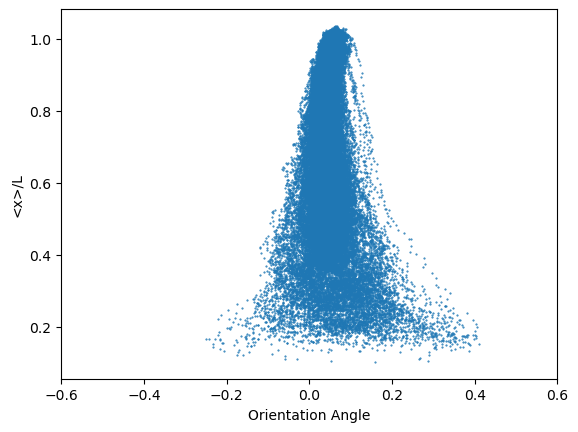

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.5,1,2])
conc = np.array([1])
box_length = np.array([33.544575])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
#edot = np.array([0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*

edot = np.array([1.48148]) #2c* Wi=200
it = 1
tr = 1
dt = 0.0001
tau_r = np.array([193]) #relaxation time
# tau_r = np.array([122,135,193]) #relaxation time
nfft_set = 24976
tau_tumble = np.zeros(len(edot))
STD = np.zeros(len(edot))

# xSS = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# xSSer = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# Wi = np.zeros(len(edot))

for c in range(0,len(conc)):
    print("conc: %g"%conc[c])
    for d in range(0,len(edot)):
        #allPSD = np.array(ntr*[np.array(nfft_set*[0.0])]) #nfft_set points in PSD
        allPSD = []
        alltau = []
        print("edot: %g"%edot[d])
        for tr in range(tr,tr+1):
            
            file_name = "prop/RG" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            file_name_ext = "prop/E" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            
            if tr==1:
                print(file_name)
                print(file_name_ext)
            
            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tstart*Nc:,0]
            chain = my_data[tstart*Nc:,1]
            Gxy_data = my_data[tstart*Nc:,3]
            Gxx_data = my_data[tstart*Nc:,2]
            Gyy_data = my_data[tstart*Nc:,5]
            #print(Gxx_data)
            
            my_data_ext = np.loadtxt(file_name_ext,delimiter=' ')
            ext_x_data =  my_data_ext[tstart*Nc:,2]
                
            
            """
            Get data for a random chain
            """     
            Gxy = []
            Gxx = []
            Gyy = []
            ext_x = []
            t = []
            ran = 0
            #print(ran)
            for i in range(tstart*ran,len(time)):
                #print(i)
                if chain[i]==ran:
                    t.append(time[i])
                    Gxy.append(Gxy_data[i])
                    Gxx.append(Gxx_data[i])
                    Gyy.append(Gyy_data[i])
                    ext_x.append(ext_x_data[i])
            #print(Gxx)
            
            """
            Calculate orientation angle
            """ 
            allOA = np.zeros(len(Gxx))
            for i in range(0,len(Gxx)):
                allOA[i] = 0.5*np.arctan(2*Gxy[i]/(Gxx[i]-Gyy[i]))
                
            plt.plot(allOA,ext_x,"o",markersize=0.5)
            plt.xlim(-0.6,0.6)
            plt.xlabel("Orientation Angle")
            plt.ylabel("<x>/L")

            
#     """
#     Output Ext(orientation)_conc
#     """     
#     with open('tumble/Ext(Orientation)_'+str(conc[c])+'c_it'+str(it)+".csv",mode='w') as practice_file:
#         practice = csv.writer(practice_file,delimiter=',')
#         y = ["Orientation","Extension"]
#         practice.writerow(y)
#         for i in range(0,len(allOA)):
#             x = [allOA[i],ext_x[i]]
#             practice.writerow(x)
            
            
            
            
            
            
            
            
            
            
            

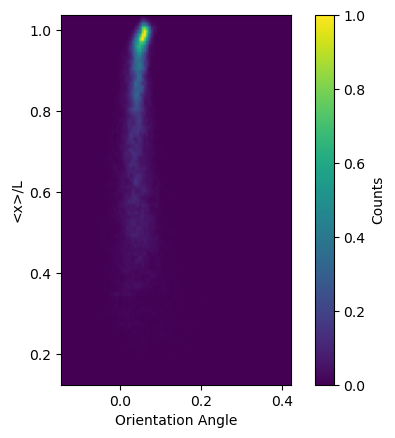

In [13]:
# Create a 2D histogram (heat map)
heatmap, xedges, yedges = np.histogram2d(allOA, ext_x, bins=(100, 100))

#Normalize the heatmap
heatmap = heatmap / np.max(heatmap)

# Plot the heat map
plt.imshow(heatmap.T, origin='lower', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Counts')
plt.xlabel("Orientation Angle")
plt.ylabel("<x>/L")
plt.show()


conc: 2
edot: 1.03627
prop/RG50_10_2.000000_26.624347_0_3.00_3.00_10.00_1.03627_1_1.txt
prop/E50_10_2.000000_26.624347_0_3.00_3.00_10.00_1.03627_1_1.txt


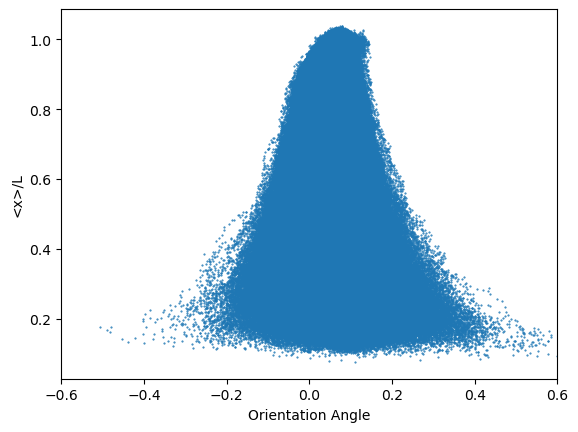

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Nb = 50
Nc = 10
#conc = np.array([0.5,1,2])
conc = np.array([2])
box_length = np.array([26.624347])
#box_length = np.array([42.263516,33.544575,26.624347])
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
#edot = np.array([0.04098,0.08197,0.16393,0.81967,1.63934]) #for 0.5c*
#edot = np.array([0.03704,0.07407,0.14815,0.74074,1.48148]) #for 1c*
#edot = np.array([0.02591,0.05181,0.10363,0.51813,1.03627]) #for 2c*

edot = np.array([1.03627]) #2c* Wi=200
it = 1
ntr = 15
dt = 0.0001
#tau_r = np.array([122]) #relaxation time
# tau_r = np.array([122,135,193]) #relaxation time
nfft_set = 24976
tau_tumble = np.zeros(len(edot))
STD = np.zeros(len(edot))

# xSS = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# xSSer = np.array(len(Ncharges)*[np.array(len(edot)*[0.0])])
# Wi = np.zeros(len(edot))

for c in range(0,len(conc)):
    print("conc: %g"%conc[c])
    for d in range(0,len(edot)):
        #allPSD = np.array(ntr*[np.array(nfft_set*[0.0])]) #nfft_set points in PSD
        allPSD = []
        alltau = []
        OA_allchains = []
        ext_allchains = []
        print("edot: %g"%edot[d])
        for tr in range(1,ntr+1):
            
            file_name = "prop/RG" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            file_name_ext = "prop/E" + str(Nb)+ "_" + str(Nc) + "_" + format(conc[c],'.6f') + "_" +format(box_length[c],'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[d],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            
            if tr==1:
                print(file_name)
                print(file_name_ext)
            
            """
            Extracting data
            """     
            tstart = 100
            my_data = np.loadtxt(file_name,delimiter=' ')
            time = my_data[tstart*Nc:,0]
            chain = my_data[tstart*Nc:,1]
            Gxy_data = my_data[tstart*Nc:,3]
            Gxx_data = my_data[tstart*Nc:,2]
            Gyy_data = my_data[tstart*Nc:,5]
            #print(Gxx_data)
            
            my_data_ext = np.loadtxt(file_name_ext,delimiter=' ')
            ext_x_data =  my_data_ext[tstart*Nc:,2]
                
            
            """
            Get data for each chain and calculate PSD
            """     

            for n in range(Nc):
                Gxy = []
                Gxx = []
                Gyy = []
                t = []
                ext_x = []
                

                for i in range(tstart * n, len(time)):
                    if chain[i] == n:
                        t.append(time[i])
                        Gxy.append(Gxy_data[i])
                        Gxx.append(Gxx_data[i])
                        Gyy.append(Gyy_data[i])
                        ext_x.append(ext_x_data[i])

                """
                Calculate orientation angle for each chain
                """
                allOA = 0.5 * np.arctan2(2 * np.array(Gxy), np.array(Gxx) - np.array(Gyy))
                
                OA_allchains.append(allOA)
                ext_allchains.append(ext_x)
                
#                 print(len(allOA))
#                 print(len(ext_x))
            
        """
        Plot
        """ 
        allOA_con = np.concatenate(OA_allchains)
        ext_con = np.concatenate(ext_allchains)
        plt.plot(allOA_con,ext_con,"o",markersize=0.5)
        plt.xlim(-0.6,0.6)
        plt.xlabel("Orientation Angle")
        plt.ylabel("<x>/L")
        
        max_OA = max(allOA_con)
        max_ext = max(ext_con)


        """
        Output Ext(orientation)_conc
        """     
        with open('tumble/Ext(Orientation)_'+str(conc[c])+'c_it'+str(it)+".csv",mode='w') as practice_file:
            practice = csv.writer(practice_file,delimiter=',')
            y = ["Orientation","Extension"]
            practice.writerow(y)
            for i in range(0,len(allOA_con)):
                x = [allOA_con[i]/max_OA,ext_con[i]/max_ext]
                practice.writerow(x)
            
            
            
            
            
            
            
            
            
            
            

In [21]:
new = np.concatenate(OA_allchains)

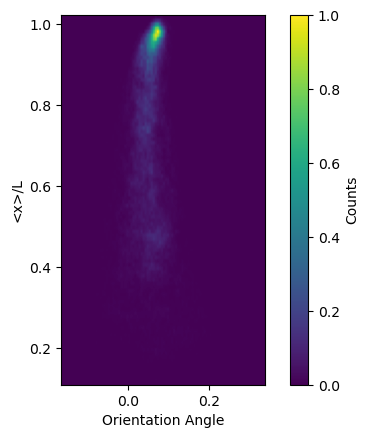

In [43]:
# Create a 2D histogram (heat map)
heatmap, xedges, yedges = np.histogram2d(allOA, ext_x, bins=(100, 100))

#Normalize the heatmap
heatmap = heatmap / np.max(heatmap)

# Plot the heat map
plt.imshow(heatmap.T, origin='lower', cmap='viridis', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Counts')
plt.xlabel("Orientation Angle")
plt.ylabel("<x>/L")
plt.show()


In [11]:
edot = np.array([0.04098,0.08197,0.16393,0.40984,0.61475,0.81967,1.02459,1.22951,1.63934])
print(edot*122)

[  4.99956  10.00034  19.99946  50.00048  74.9995   99.99974 124.99998
 150.00022 199.99948]


In [48]:
max_OA = max(allOA_con)
max_ext = max(ext_con)


"""
Output Ext(orientation)_conc
"""     
with open('tumble/Ext(Orientation)_'+str(conc[c])+'c_it'+str(it)+".csv",mode='w') as practice_file:
    practice = csv.writer(practice_file,delimiter=',')
    y = ["Orientation","Extension"]
    practice.writerow(y)
    for i in range(0,len(allOA_con)):
        x = [allOA_con[i]/max_OA,ext_con[i]/max_ext]
        practice.writerow(x)

In [46]:
np.max(2,3,5,7,4,6)

TypeError: output must be an array